## CS 5180 Reinforcement Learning and Sequential Decision Making
### Exercise 7: Function Approximation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import environment
import algorithms
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import deque
import plots
import gymnasium as gym
import algorithms_mountain_car
from tqdm import trange

## Q3 Four Rooms, yet again

### Q3 (a)
I have designed a state aggregation algorithm, which takes in "scale" as an input, and gives out the feature vector (one hot encoded) as the output. The scale here represents the scale of the imaginary grid that is superimposed on the original four rooms grid. So for example if the scale is 2, then the imaginary grid is twice as big as the four rooms grid (scaled by 2 in both x and y directions). here, the imaginary grid will have 36 squares (features) each containing 4 states from the four rooms grid. To calculate the $\widehat{q}(s, a, w)$, I have used unique weights corresponding to the four actions, and the gradient is basically the feature vector that I get from my function as described above

In [2]:
four_rooms = environment.FourRooms()
equi_prob = {a:1/len(four_rooms.action_space) for a in four_rooms.action_space}
random_policy = {s:equi_prob for s in four_rooms.state_space}

### Q3 (b) Semi-gradient one-step SARSA

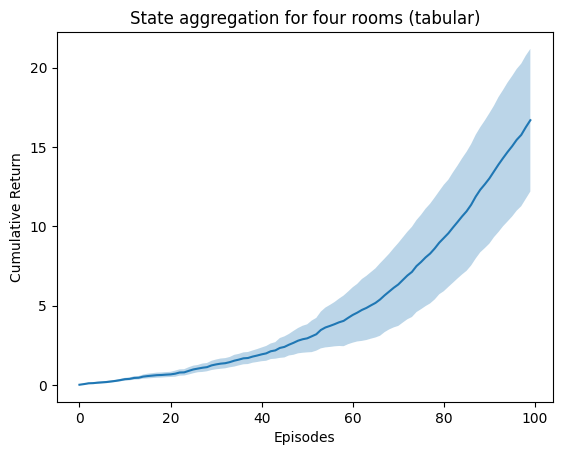

In [5]:
num_trials = 10
num_episodes = 100
rewards_tab = np.zeros([num_trials, num_episodes])
state_agg_scale = 1

for t in range(num_trials):
    weights = four_rooms.init_state_agg(scale = state_agg_scale)
    updated_weights, rewards_tab[t, :] = algorithms.sarsa_state_agg(four_rooms, weights, random_policy, gamma=0.99, num_episodes=100, eps=0.01, alpha=0.3)

plots.line_plot(rewards_tab, num_episodes, num_trials, "State aggregation for four rooms (tabular)")

### Q3 (c) Other choices of state aggregation

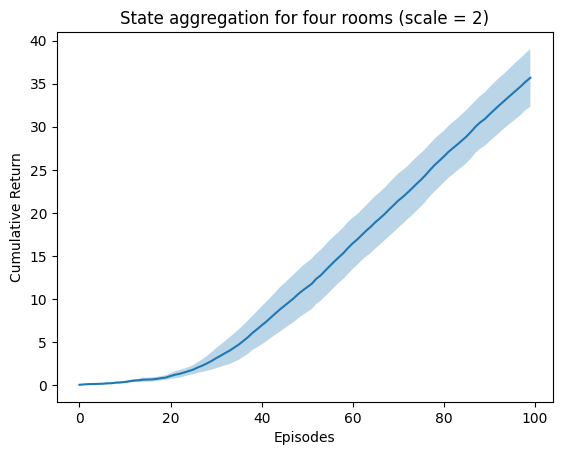

In [6]:
num_trials = 10
num_episodes = 100
rewards_2 = np.zeros([num_trials, num_episodes])
state_agg_scale = 2

for t in range(num_trials):
    weights = four_rooms.init_state_agg(scale = state_agg_scale)
    updated_weights, rewards_2[t, :] = algorithms.sarsa_state_agg(four_rooms, weights, random_policy, gamma=0.99, num_episodes=100, eps=0.01, alpha=0.3)

plots.line_plot(rewards_2, num_episodes, num_trials, f"State aggregation for four rooms (scale = {state_agg_scale})")

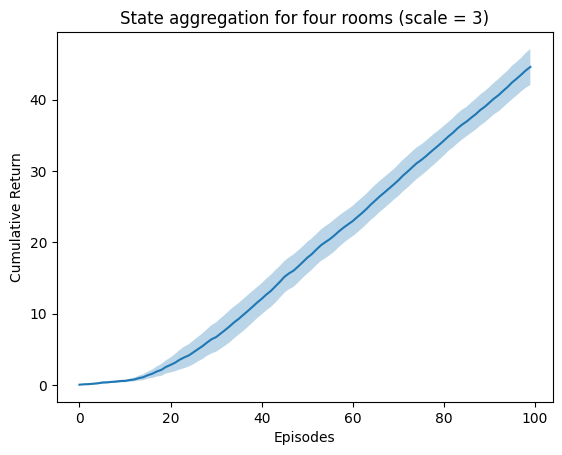

In [8]:
num_trials = 10
num_episodes = 100
rewards_3 = np.zeros([num_trials, num_episodes])
state_agg_scale = 3

for t in range(num_trials):
    weights = four_rooms.init_state_agg(scale = state_agg_scale)
    updated_weights, rewards_3[t, :] = algorithms.sarsa_state_agg(four_rooms, weights, random_policy, gamma=0.99, num_episodes=100, eps=0.01, alpha=0.3)

plots.line_plot(rewards_3, num_episodes, num_trials, f"State aggregation for four rooms (scale = {state_agg_scale})")

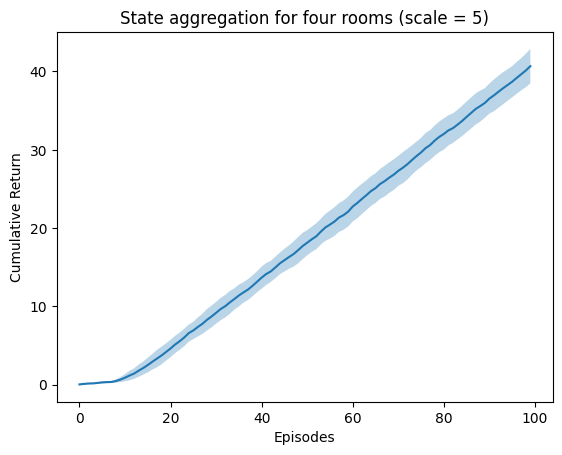

In [22]:
num_trials = 10
num_episodes = 100
rewards_5 = np.zeros([num_trials, num_episodes])
state_agg_scale = 5

for t in range(num_trials):
    weights = four_rooms.init_state_agg(scale = state_agg_scale)
    updated_weights, rewards_5[t, :] = algorithms.sarsa_state_agg(four_rooms, weights, random_policy, gamma=0.99, num_episodes=100, eps=0.01, alpha=0.3)

plots.line_plot(rewards_5, num_episodes, num_trials, f"State aggregation for four rooms (scale = {state_agg_scale})")

### Q3 (c) Other choices of state aggregation

I tried out plotting the learning curves for scales 2, 3 and 5. (Refer Q3(a) for my description of what is scale). Scale 2 performed much better than the tabular case. Scale 3 performed the best, but as I increased the scale further, the performace decreased. This is expected because as we increase the scale, more and more states fall under the same aggregated states, and the number of features decrease. This results in the decrease of performance  

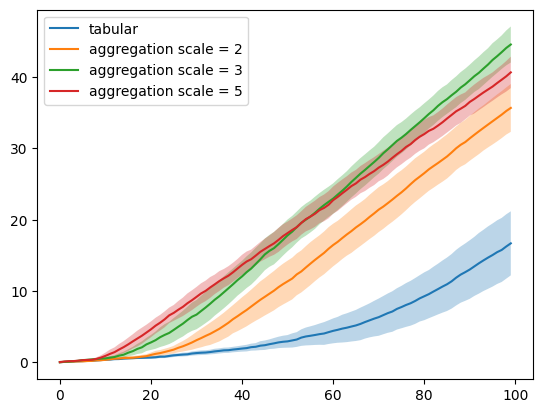

In [23]:
legend = ["tabular", "aggregation scale = 2", "aggregation scale = 3", "aggregation scale = 5"]
for i, r in enumerate([rewards_tab, rewards_2, rewards_3, rewards_5]):
    x = range(num_episodes)
    y = np.mean(r, axis=0)
    plt.plot(y, label = legend[i])
    std_error = np.std(r, axis = 0)/np.sqrt(num_trials)
    plt.fill_between(x, y + 1.96*std_error, y - 1.96*std_error, alpha = 0.3)

plt.legend()
plt.show()

### Q3 (d)
It is clear from that including the constant parameter improved the performance. Just having [x, y] as the features is not sufficient. Adding the constant feature helped increase the size of the feature vector which led to the better performance (since the number of weights increased as well). Adding the constant feature did help a bit, but clearly the algorithm can do much better with selection of the right features.

As far as the actions are concerned, I have unique weights for each action. Basically for $n$ actions, and $d$ features, I have initialized $n$ instances of $[w_1, w_2, w_3,... , w_d]^T$ weight vectors. The features are not directly dependant on my actions 

The performace is poor as compared to the state aggregation methods. This is expected because we have much more features in state aggregation as compared to only 2 or 3 features here. This significantly hampered the $q$ value estimation. Maybe as we incorporate more features in this feature vector, we'll be able to improve our performance.

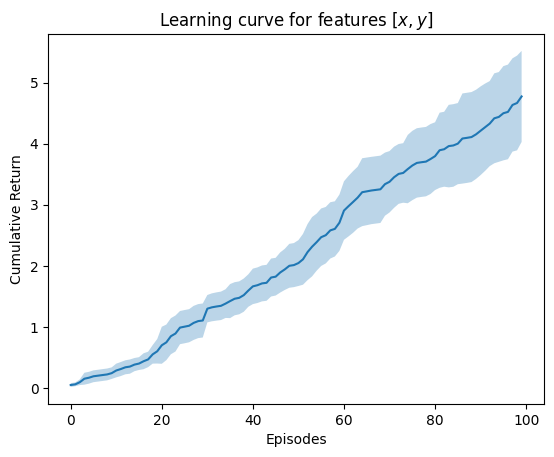

In [4]:
num_trials = 10
num_episodes = 100
rewards_xy = np.zeros([num_trials, num_episodes])
four_rooms = environment.FourRooms()
fa = environment.FunctionApproximation(four_rooms)

for t in range(num_trials):
    weights = fa.init_func_approx()
    updated_weights, rewards_xy[t, :] = algorithms.sarsa_func_approx(four_rooms, fa, weights, random_policy, 
                                                                  gamma=0.99, num_episodes=100, eps=0.1, alpha=0.001)

plots.line_plot(rewards_xy, num_episodes, num_trials, "Learning curve for features $[x, y]$")

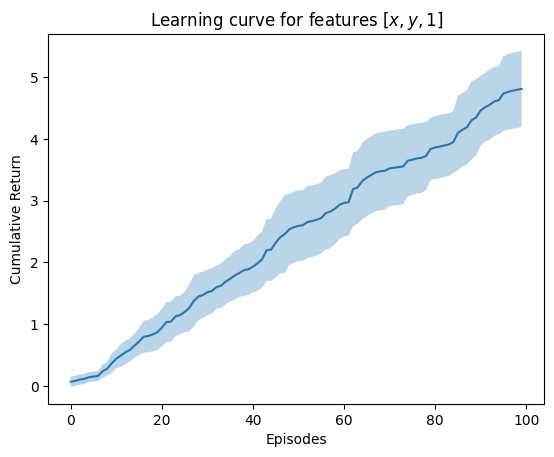

In [5]:
num_trials = 10
num_episodes = 100
rewards_xy1 = np.zeros([num_trials, num_episodes])
four_rooms = environment.FourRooms()
fa = environment.FunctionApproximation(four_rooms)

for t in range(num_trials):
    weights = fa.init_func_approx()
    updated_weights, rewards_xy1[t, :] = algorithms.sarsa_func_approx(four_rooms, fa, weights, random_policy, 
                                                                  gamma=0.99, num_episodes=100, eps=0.1, alpha=0.001)

plots.line_plot(rewards_xy1, num_episodes, num_trials, "Learning curve for features $[x, y, 1]$")


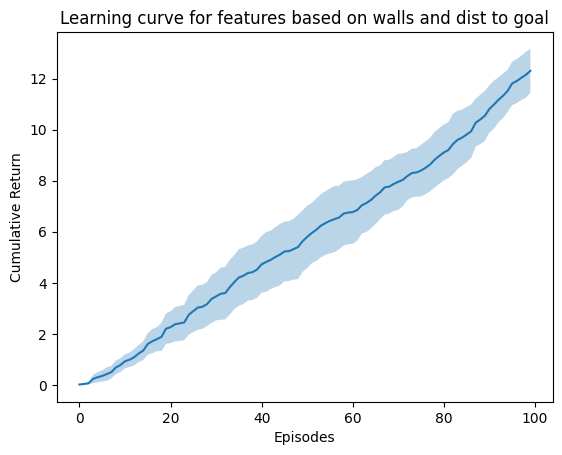

In [7]:
num_trials = 10
num_episodes = 100
rewards_f = np.zeros([num_trials, num_episodes])
four_rooms = environment.FourRooms()
fa = environment.FunctionApproximation(four_rooms)

for t in range(num_trials):
    weights = fa.init_func_approx()
    updated_weights, rewards_f[t, :] = algorithms.sarsa_func_approx(four_rooms, fa, weights, random_policy, 
                                                                  gamma=0.99, num_episodes=100, eps=0.1, alpha=0.001)

plots.line_plot(rewards_f, num_episodes, num_trials, f"Learning curve for features based on walls and dist to goal")


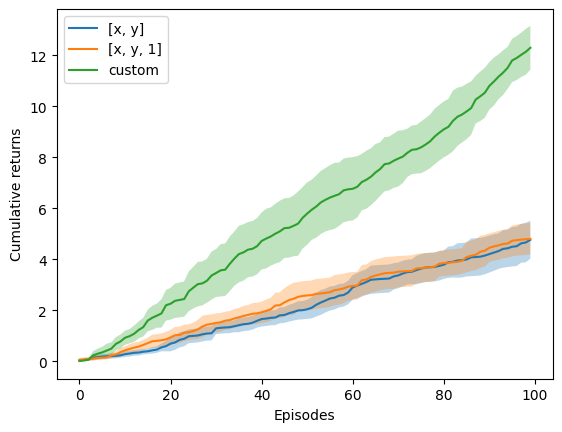

In [8]:
legend = ["[x, y]", "[x, y, 1]", "custom"]
for i, r in enumerate([rewards_xy, rewards_xy1, rewards_f]):
    x = range(num_episodes)
    y = np.mean(r, axis=0)
    plt.plot(y, label = legend[i])
    std_error = np.std(r, axis = 0)/np.sqrt(num_trials)
    plt.fill_between(x, y + 1.96*std_error, y - 1.96*std_error, alpha = 0.3)

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Cumulative returns")
plt.show()

### Q3 (e)

In addition to $[x, y, 1]$, I incorporated a few more features. Specifically, wall_up, wall_down, wall_left, wall_right are boolean features which indicate if there are walls on either side of a state. Additionally, I also have added dist_to_goal feature, which gives me the manhattan distance to the goal. I saw a decent improvement in the performance as evident in the learning curve. These features will work even if the goal is not $(10, 10)$.  

## Q4 Mountain Car

In [13]:
mountain_car = gym.make('MountainCar-v0', render_mode = 'rgb_array', max_episode_steps=600)

### Reproducing figure 10.1

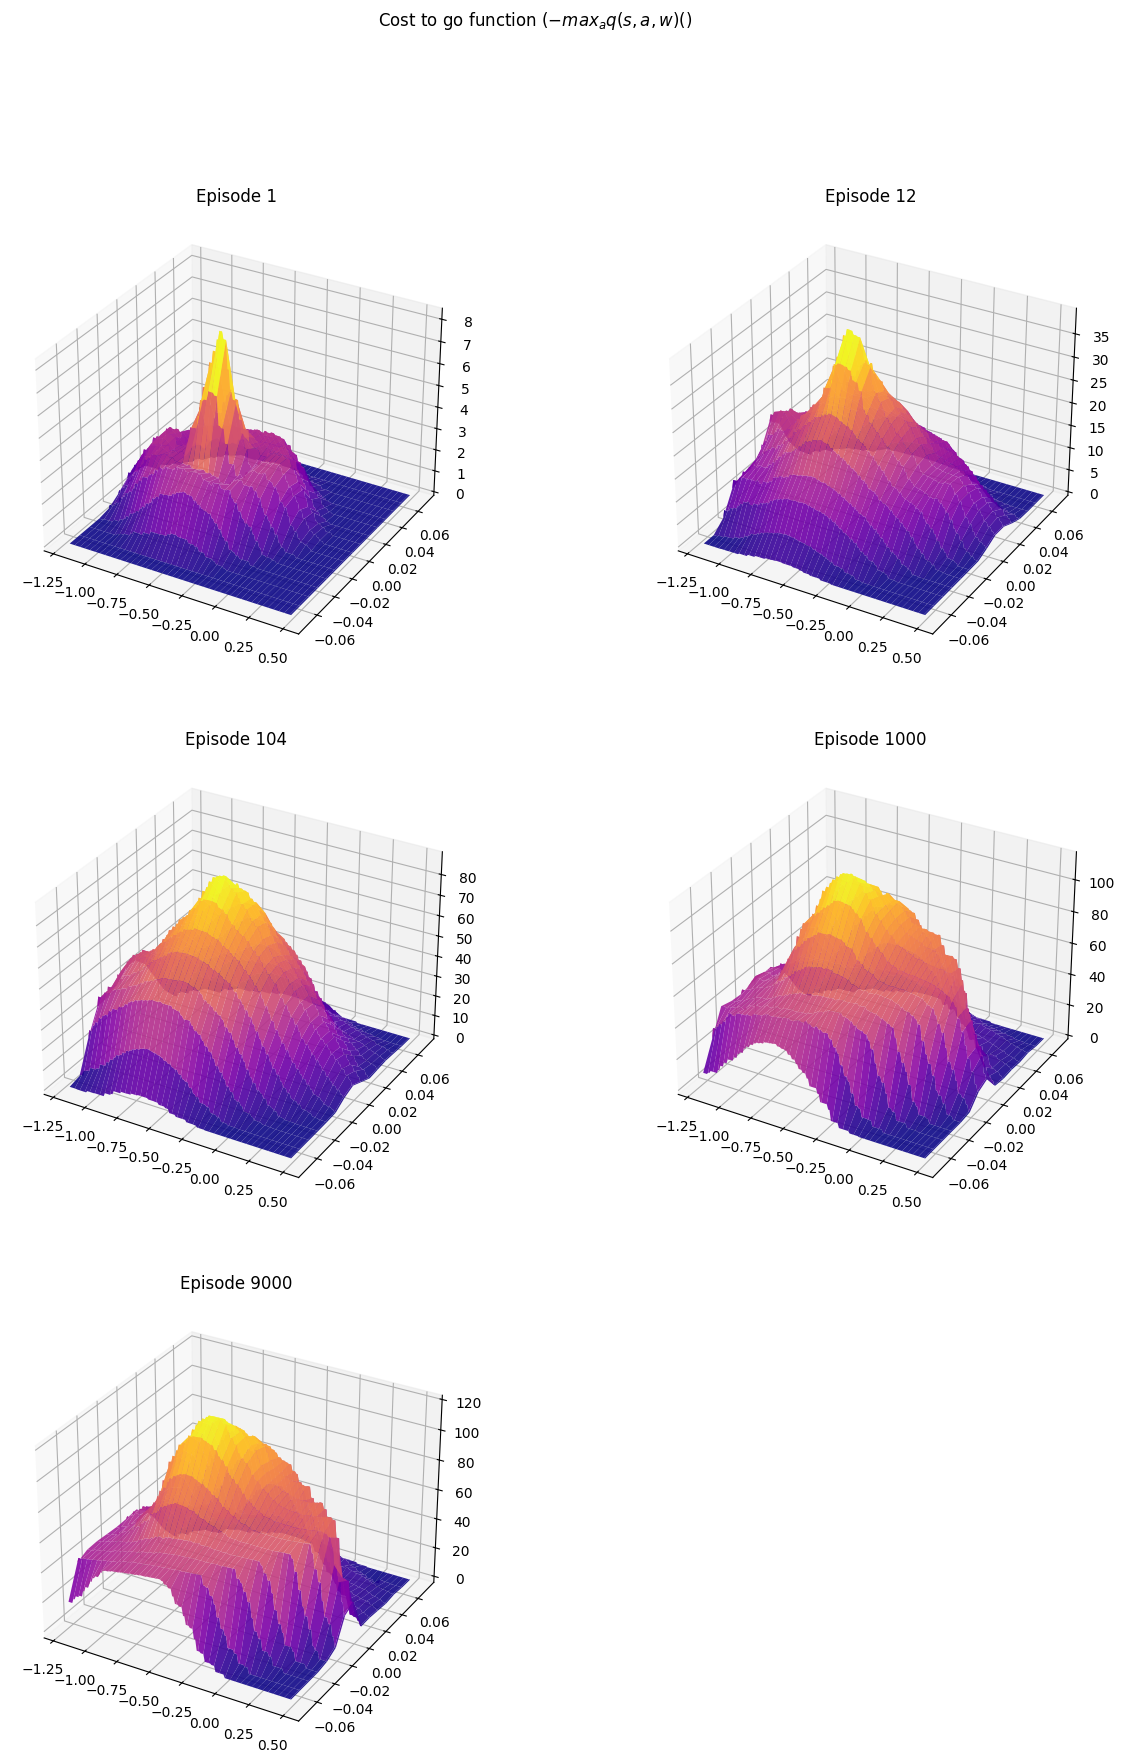

In [47]:
episodes = [1, 12, 104, 1000, 9000]
pos_range = np.arange(-1.2, 0.5, 0.01)
vel_range = np.arange(-0.07, 0.07, 0.01)
X = pos_range
Y = vel_range
X, Y = np.meshgrid(X, Y)

cost_to_go = np.ndarray([len(vel_range), len(pos_range)])
fig = plt.figure(figsize= (15, 20))

for idx_e, e in enumerate(episodes):
    w, _ = algorithms_mountain_car.sarsa_mountain_car(mountain_car, 
                                            gamma = 1,
                                            num_episodes = e,
                                            eps = 0,
                                            alpha = (0.5/8))
    
    for row, vel in enumerate(vel_range):
        for col, pos in enumerate(pos_range):
            q_vals = [algorithms_mountain_car.get_approx_q((pos, vel), a, w) for a in [0, 1, 2]]
            cost_to_go[row, col] = -max(q_vals)

            
    ax = fig.add_subplot(3, 2, idx_e+1, projection='3d')
    Z = cost_to_go
    ax.plot_surface(X, Y, Z, alpha = 0.9, antialiased = True, cmap=cm.plasma)
    ax.set_title(f"Episode {e}")

plt.suptitle("Cost to go function ($-max_{a}q(s, a, w)$()")
plt.show()

### Reproducing figure 10.2 

In [33]:
alpha_vals = [0.1/8, 0.2/8, 0.5/8]
trials = 100
episodes = 500
steps_per_episode = np.zeros([len(alpha_vals), trials, episodes])

for idx_a, a in enumerate(alpha_vals):
    for t in trange(trials):
        _, steps_per_episode[idx_a, t, :] = algorithms_mountain_car.sarsa_mountain_car(mountain_car, 
                                                gamma = 1,
                                                num_episodes = episodes,
                                                eps = 0,
                                                alpha = a)
        
np.save(f"steps_{trials}trials_{episodes}ep", steps_per_episode)

100%|██████████| 100/100 [33:16<00:00, 19.97s/it]


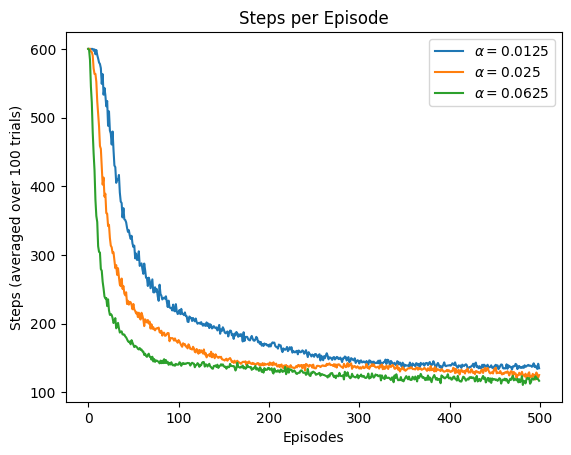

In [40]:
steps = np.load(f"steps_{trials}trials_500ep.npy")
for idx_a, a in enumerate(alpha_vals):
    plt.plot(np.mean(steps[idx_a,:,:], axis=0), label = f"$\\alpha = ${a}")

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Steps (averaged over 100 trials)")
plt.title("Steps per Episode")
plt.show()